# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from urllib.request import urlopen
import json
import pandas as pd

#!pip install calplot
import calplot
import pandas as pd
import calplot 
import matplotlib.pyplot as plt
import seaborn as sb

#!pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [38]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

Please Specify the the path to the Data Department Police. <br>
Alternatively, please copy the csv in the current folder. <br>
Be patient, it takes arround 3 min.

In [40]:
data_PATH = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'
df = pd.read_csv(data_PATH, parse_dates=[['Date', 'Time']])

In [41]:
# We want to drop crimes in 2018
df['Year']=pd.DatetimeIndex(df['Date_Time']).year
df = df[~(df['Year'] > 2017)]
df.head()

,Date_Time,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,...,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year
0,2004-11-22 17:50:00,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,INGLESIDE,NONE,GENEVA AV / SANTOS ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
1,2005-10-18 20:00:00,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,PARK,NONE,TURK ST / STJOSEPHS AV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005
2,2004-02-15 02:00:00,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,SOUTHERN,NONE,BRANNAN ST / 1ST ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
3,2011-02-18 05:27:00,11014543126030,110145431,26030,ARSON,ARSON,Friday,INGLESIDE,NONE,0 Block of SANJUAN AV,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0,2011
4,2010-11-21 17:00:00,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,SOUTHERN,NONE,400 Block of 10TH ST,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0,2010


### First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2)

# Day of the Week Plots

In [42]:
df['Year'] = pd.DatetimeIndex(df['Date_Time']).year
df['DayOfWeek'] = df['Date_Time'].dt.weekday

In [43]:
df_week_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'DayOfWeek']).size().unstack()
df_week_grouped

DayOfWeek,0,1,2,3,4,5,6
Category,,,,,,,
ASSAULT,22203,22001,22228,21661,23903,25686,25476
BURGLARY,12706,12797,13068,13155,15172,11610,10463
DISORDERLY CONDUCT,1450,1541,1576,1419,1211,1370,1271
DRIVING UNDER THE INFLUENCE,629,580,572,682,856,1139,1102
DRUG/NARCOTIC,16448,18574,20104,18052,16009,13950,13215
DRUNKENNESS,1176,1087,1165,1133,1414,1823,1878
LARCENY/THEFT,61960,63597,64920,65404,72267,72109,64108
PROSTITUTION,1123,3003,3291,3630,2776,1571,1059
ROBBERY,7608,7407,7448,7405,7655,8074,7820


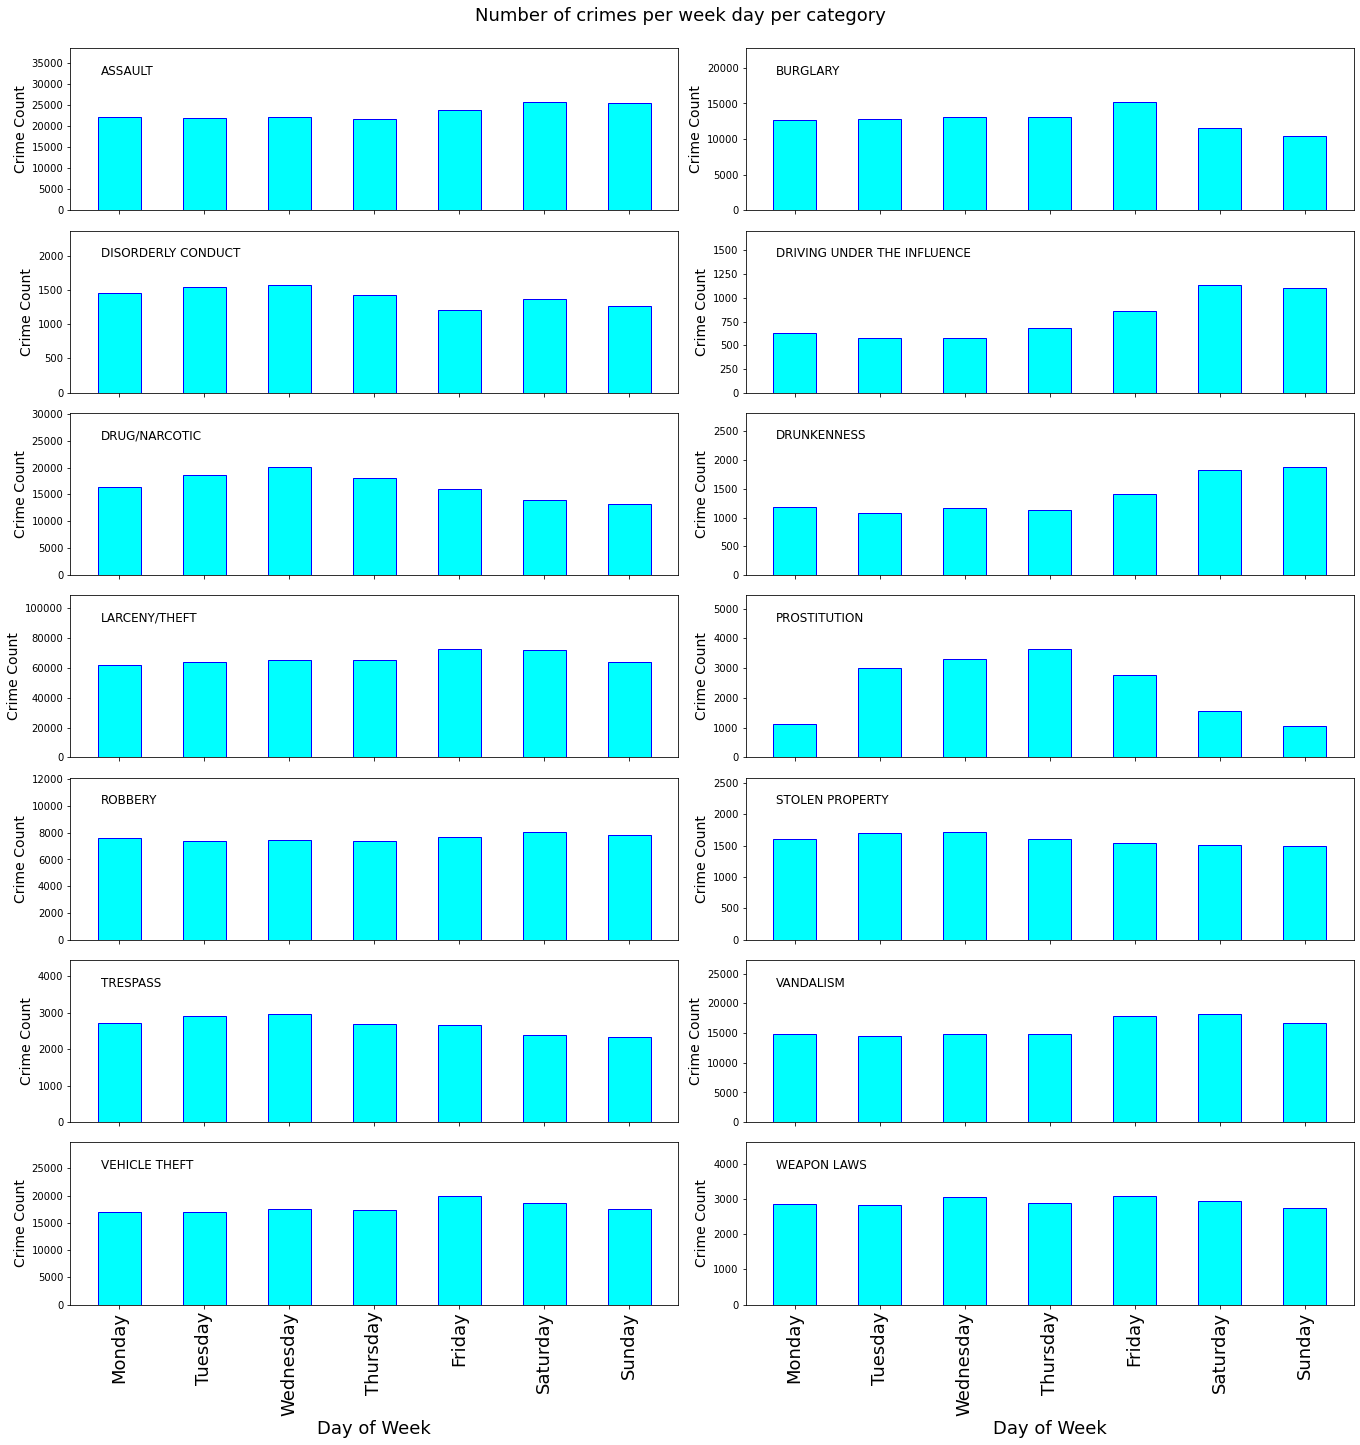

In [44]:
x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig = plt.figure(figsize=(19, 20))
fig.suptitle('Number of crimes per week day per category',y=1.001, fontsize=18)

for plot_index in range(1,len(focuscrimes)+1):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(int(len(focuscrimes)/2),2,plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
   # ax = sb.barplot(x = df_week_grouped.iloc[plot_index - 1].index, y = df_week_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.bar(df_week_grouped.iloc[plot_index-1].index, df_week_grouped.iloc[plot_index-1],width=0.5,edgecolor="blue",color='cyan')
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_week_grouped.iloc[plot_index-1].name, y = 0.80, x = 0.05, loc = 'left')
    plt.ylabel('Crime Count',fontsize=14)
    plt.xlabel('Day of Week',fontsize=18)
    plt.xticks(df_week_grouped.iloc[plot_index-1].index,x_values, rotation=90, fontsize=18)
    plt.ylim(top=(np.max(df_week_grouped.iloc[plot_index-1])+(np.max(df_week_grouped.iloc[plot_index-1])*0.5)))
    if plot_index<(len(focuscrimes)-1):
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.xlabel("")
plt.tight_layout()
plt.show()

According to the day of week plots, we noticed a high number of the prostitution crimes between Tuesday to Friday reaching a peak at roughly 4000 crimes in total on Thursdays. This trend is quite interesting because we expected that the majority of these crimes to happen on weekends. One explanation is that the police has more time to investigate these type of crimes on weekdays due to the fact that it takes more organization and time to deal with such crimes.

Regarding to the Drug/Narcotic category, it follows similar trend with the previous category of crime having the highest number of crimes on weekdays. We suppose that the explanation of this phenomenon is the same as the Prostitution category. 


Remarkable is the fact that the Larcany/Theft category has the highest amount of reported crimes in the week making it the most common type of crime. Specifically, the Larcany/Theft crimes are above 60000 for every day of the week in total. On the contrary, the driving under influence category present the smallest number of crimes compared to the rest of the categories.

On the other hand, the driving under influence, vandalism, assault and drunknness categories follow the trend as we expected having the peak on weekends. The alcohol consumption could be one reason of committing these types of crime which is proven by a lot of studies. 

Finally, it is worth noting that the majority of burglaries happen on Fridays. We suppose that this day is a very popular day for real estate burglaries because inhabitants likely go out after work for a drink or for a party. 

# Monthly plots

In [45]:
df['month'] = pd.DatetimeIndex(df['Date_Time']).month
df_month_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'month']).size().unstack()
df_month_grouped

month,1,2,3,4,5,6,7,8,9,10,11,12
Category,,,,,,,,,,,,
ASSAULT,13487,12542,14121,13577,13906,13499,13560,13933,14407,14581,13009,12536
BURGLARY,7561,6685,7697,7462,7602,7060,7604,7513,7174,7423,7441,7749
DISORDERLY CONDUCT,871,784,877,798,885,753,791,847,863,841,844,684
DRIVING UNDER THE INFLUENCE,453,483,503,422,508,383,428,471,487,479,479,464
DRUG/NARCOTIC,10937,10356,10831,9665,9789,8636,8994,10099,9684,9973,9195,8193
DRUNKENNESS,827,743,838,783,859,775,785,854,809,908,739,756
LARCENY/THEFT,37800,34067,37853,37146,38402,38023,40762,41501,40136,41581,38424,38670
PROSTITUTION,1622,1419,1301,1490,1359,1201,1246,1299,1528,1353,1366,1269
ROBBERY,4508,3880,4188,4430,4521,4568,4570,4834,4410,4817,4354,4337


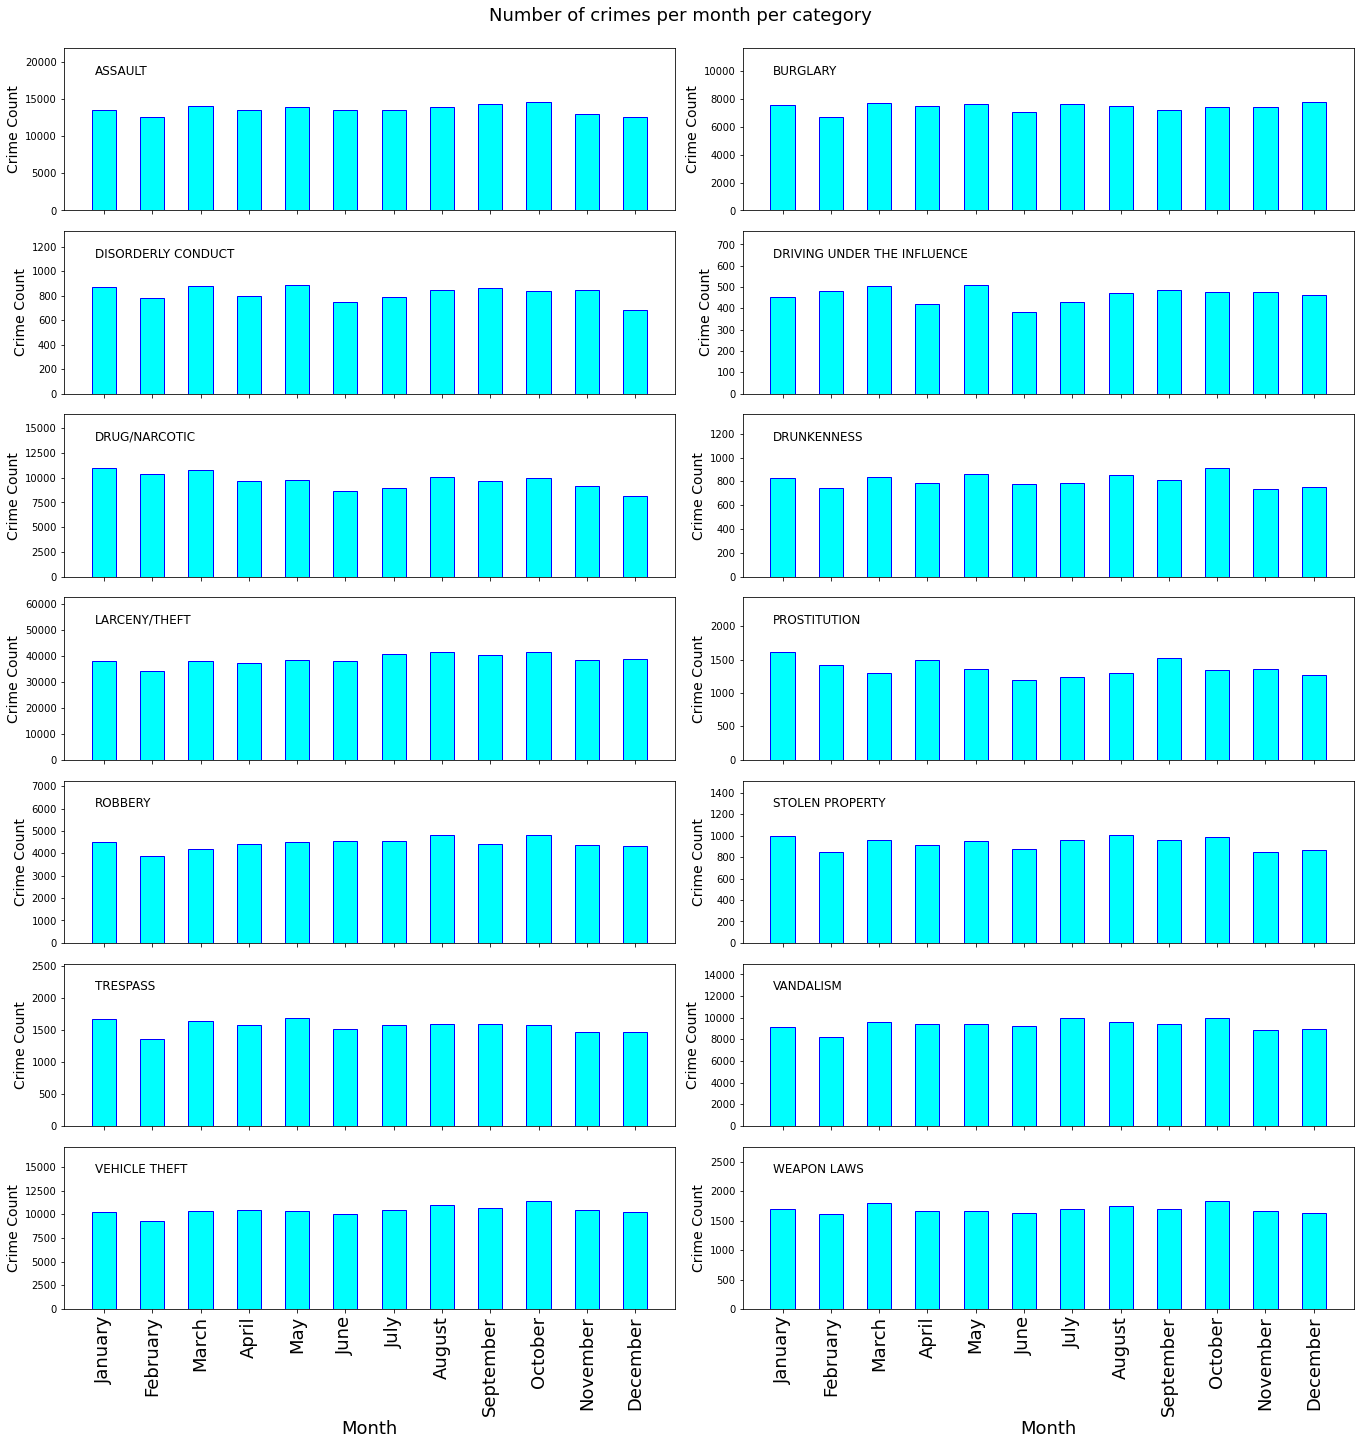

In [46]:
x_values = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

fig = plt.figure(figsize=(19, 20))
fig.suptitle('Number of crimes per month per category',y=1.001, fontsize=18)

for plot_index in range(1,len(focuscrimes)+1):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(int(len(focuscrimes)/2),2,plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
   # ax = sb.barplot(x = df_week_grouped.iloc[plot_index - 1].index, y = df_week_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.bar(df_month_grouped.iloc[plot_index-1].index, df_month_grouped.iloc[plot_index-1],width=0.5,edgecolor="blue",color='cyan')
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_month_grouped.iloc[plot_index-1].name, y = 0.80, x = 0.05, loc = 'left')
    plt.ylabel('Crime Count',fontsize=14)
    plt.xlabel('Month',fontsize=18)
    plt.xticks(df_month_grouped.iloc[plot_index-1].index,x_values, rotation=90, fontsize=18)
    plt.ylim(top=(np.max(df_month_grouped.iloc[plot_index-1])+(np.max(df_month_grouped.iloc[plot_index-1])*0.5)))

    if plot_index<(len(focuscrimes)-1):
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.xlabel("")
plt.tight_layout()
plt.show()

Looking at the monthly plots, we can notice that many crimes are slightly reduced in the first two winter and summer months. Namely in November and December, many crimes like stolen property and assault were slightly reduced. Regarding to the summer months, many crimes like Dryg/Narcotic and Prostitution hit a trough in June and July. 

In addition, in February there is a decrease in incidents in many categories of crimes leke burglary and trespass but considering that February (28 days) has 2 to 3 days less than the rest of the months we need more analysis to prove it.

# 24-hour cycle plots

In [47]:
df['Hour'] = pd.DatetimeIndex(df['Date_Time']).hour
hours_in_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hours_in_day)):
    if i+1 == len(hours_in_day):
        from_time = hours_in_day[i]
        to_time = hours_in_day[0]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)
    else:
        from_time = hours_in_day[i]
        to_time = hours_in_day[i+1]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)
    
print(hourly_slots)

{0: '0-1', 1: '1-2', 2: '2-3', 3: '3-4', 4: '4-5', 5: '5-6', 6: '6-7', 7: '7-8', 8: '8-9', 9: '9-10', 10: '10-11', 11: '11-12', 12: '12-13', 13: '13-14', 14: '14-15', 15: '15-16', 16: '16-17', 17: '17-18', 18: '18-19', 19: '19-20', 20: '20-21', 21: '21-22', 22: '22-23', 23: '23-0'}


In [48]:
list_hourly_slots = list(hourly_slots.values())
list_hourly_slots[0]

'0-1'

In [49]:
df['hour'] = pd.DatetimeIndex(df['Date_Time']).hour
df_hour_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'hour']).size().unstack()
df_hour_grouped

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Category,,,,,,,,,,,,,,,,,,,,,
ASSAULT,8878,8074,7258,3557,2216,1754,2391,3523,5425,6034,...,7882,8809,8726,8752,8634,8344,8139,8469,8070,7757
BURGLARY,3386,2186,2358,2412,2143,1954,1968,3097,4795,4190,...,3542,4151,4622,6201,6240,4669,4083,3957,3740,3513
DISORDERLY CONDUCT,517,380,341,216,158,395,999,904,673,509,...,343,327,303,289,322,264,249,281,383,408
DRIVING UNDER THE INFLUENCE,705,647,642,286,106,59,69,46,46,55,...,75,102,144,181,187,229,277,372,503,633
DRUG/NARCOTIC,3686,2242,1817,1235,900,471,1320,2975,3910,4608,...,8763,8072,8459,8717,7761,6592,5034,4724,5647,4814
DRUNKENNESS,817,774,656,258,132,45,80,163,153,173,...,323,358,432,506,566,542,565,613,739,735
LARCENY/THEFT,18568,11481,7505,4688,3042,3060,4829,7614,12831,15227,...,24559,26096,27258,31085,37148,34850,30378,25697,25235,22907
PROSTITUTION,1342,1041,771,540,464,574,516,267,150,155,...,305,234,285,598,1162,1355,1073,1274,1569,1568
ROBBERY,2908,2987,3129,1888,1225,1056,1011,905,1013,1219,...,2086,2328,2566,2559,2704,2914,3272,3733,3695,3453


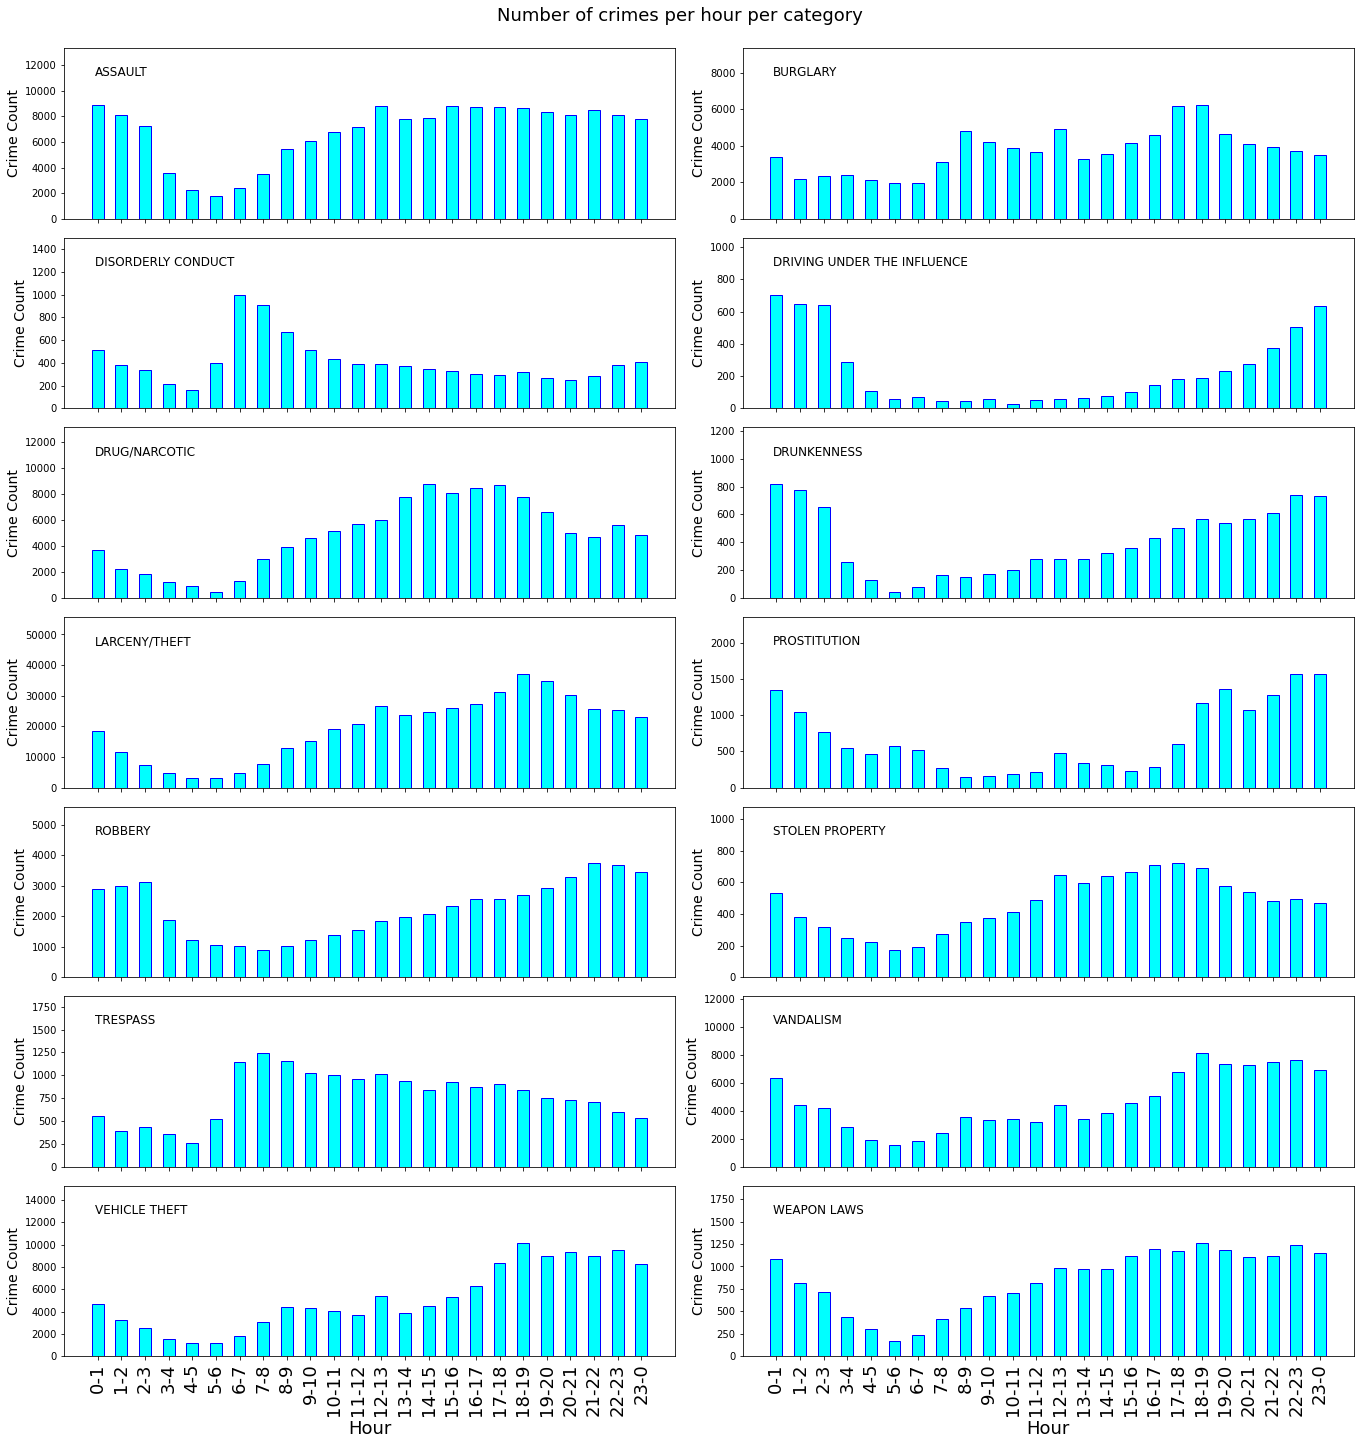

In [50]:
fig = plt.figure(figsize=(19, 20))
fig.suptitle('Number of crimes per hour per category',y=1.001, fontsize=18)

for plot_index in range(1,len(focuscrimes)+1):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(int(len(focuscrimes)/2),2,plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
   # ax = sb.barplot(x = df_week_grouped.iloc[plot_index - 1].index, y = df_week_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.bar(df_hour_grouped.iloc[plot_index-1].index, df_hour_grouped.iloc[plot_index-1],width=0.5,edgecolor="blue",color='cyan')
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_hour_grouped.iloc[plot_index-1].name, y = 0.80, x = 0.05, loc = 'left')
    plt.ylabel('Crime Count',fontsize=14)
    plt.xlabel('Hour',fontsize=18)
    plt.xticks(df_hour_grouped.iloc[plot_index-1].index,list_hourly_slots, rotation=90, fontsize=18)
    plt.ylim(top=(np.max(df_hour_grouped.iloc[plot_index-1])+(np.max(df_hour_grouped.iloc[plot_index-1])*0.5)))
    if plot_index<(len(focuscrimes)-1):
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.xlabel("")
plt.tight_layout()
plt.show()

Regarding to the hourly plots, the majority types of crimes present the smallest number of incidents at around 4-6 am in the morning. This makes sense, taking into account that there are less people on the street, therefore the incidents are very few. 

It is worth noting that the number of crimes in the Trespass and Disorderly Conduct categories show a sharp increase after 6 am.

In addition, looking at the plots we can notice that drunkneess follows similiar patterns like vandalism, drunkneess, driving under influence and prostitution having the largest number of incidents at night as we expected.  This may again confirm that the alcohol or drunk people may lead to carry out these type of crimes.

Taking these plots into account, we can say that the safest hour to be outside of your house should be between 4 and 6 am. To confirm or reject this hypothesis we need further analysis because we haven't include a significant parameter that this time there are a lot less people on the street, therefore may be more incidents per person.



# 168 hours of the week plots

In [51]:
df["hour_of_week"] = df["Date_Time"].dt.dayofweek * 24 + (df["Date_Time"].dt.hour+1)
df.head()

,Date_Time,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,...,Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,month,Hour,hour,hour_of_week
0,2004-11-22 17:50:00,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",0,INGLESIDE,NONE,GENEVA AV / SANTOS ST,...,NaN,NaN,NaN,NaN,NaN,2004,11,17,17,18
1,2005-10-18 20:00:00,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,1,PARK,NONE,TURK ST / STJOSEPHS AV,...,NaN,NaN,NaN,NaN,NaN,2005,10,20,20,45
2,2004-02-15 02:00:00,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,6,SOUTHERN,NONE,BRANNAN ST / 1ST ST,...,NaN,NaN,NaN,NaN,NaN,2004,2,2,2,147
3,2011-02-18 05:27:00,11014543126030,110145431,26030,ARSON,ARSON,4,INGLESIDE,NONE,0 Block of SANJUAN AV,...,NaN,NaN,NaN,NaN,94.0,2011,2,5,5,102
4,2010-11-21 17:00:00,10108108004134,101081080,4134,ASSAULT,BATTERY,6,SOUTHERN,NONE,400 Block of 10TH ST,...,NaN,NaN,NaN,NaN,32.0,2010,11,17,17,162


In [52]:
df_hour_of_week_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'hour_of_week']).size().unstack()
df_hour_of_week_grouped

hour_of_week,1,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
Category,,,,,,,,,,,,,,,,,,,,,
ASSAULT,1112,808,771,372,269,230,319,520,859,880,...,1043,1183,1225,1259,1217,1296,1238,1264,1165,1035
BURGLARY,505,286,347,360,325,288,285,498,781,672,...,422,512,522,688,637,502,517,476,507,507
DISORDERLY CONDUCT,63,32,42,25,20,81,198,149,109,89,...,34,38,49,39,47,35,36,40,47,55
DRIVING UNDER THE INFLUENCE,75,77,67,34,6,10,5,2,9,9,...,14,22,30,30,40,50,39,64,79,102
DRUG/NARCOTIC,518,318,244,177,154,81,195,383,526,653,...,839,720,953,1015,935,666,515,535,795,678
DRUNKENNESS,92,63,79,27,13,4,11,17,20,24,...,57,69,90,83,88,97,97,89,130,94
LARCENY/THEFT,2122,1145,825,580,421,466,727,1238,2029,2327,...,3767,3918,3915,4154,4241,3837,3536,3009,3093,2457
PROSTITUTION,136,81,64,48,36,38,51,25,13,13,...,3,2,6,8,16,33,24,39,69,98
ROBBERY,371,342,340,195,152,168,135,111,158,195,...,268,264,328,335,313,375,451,464,495,478


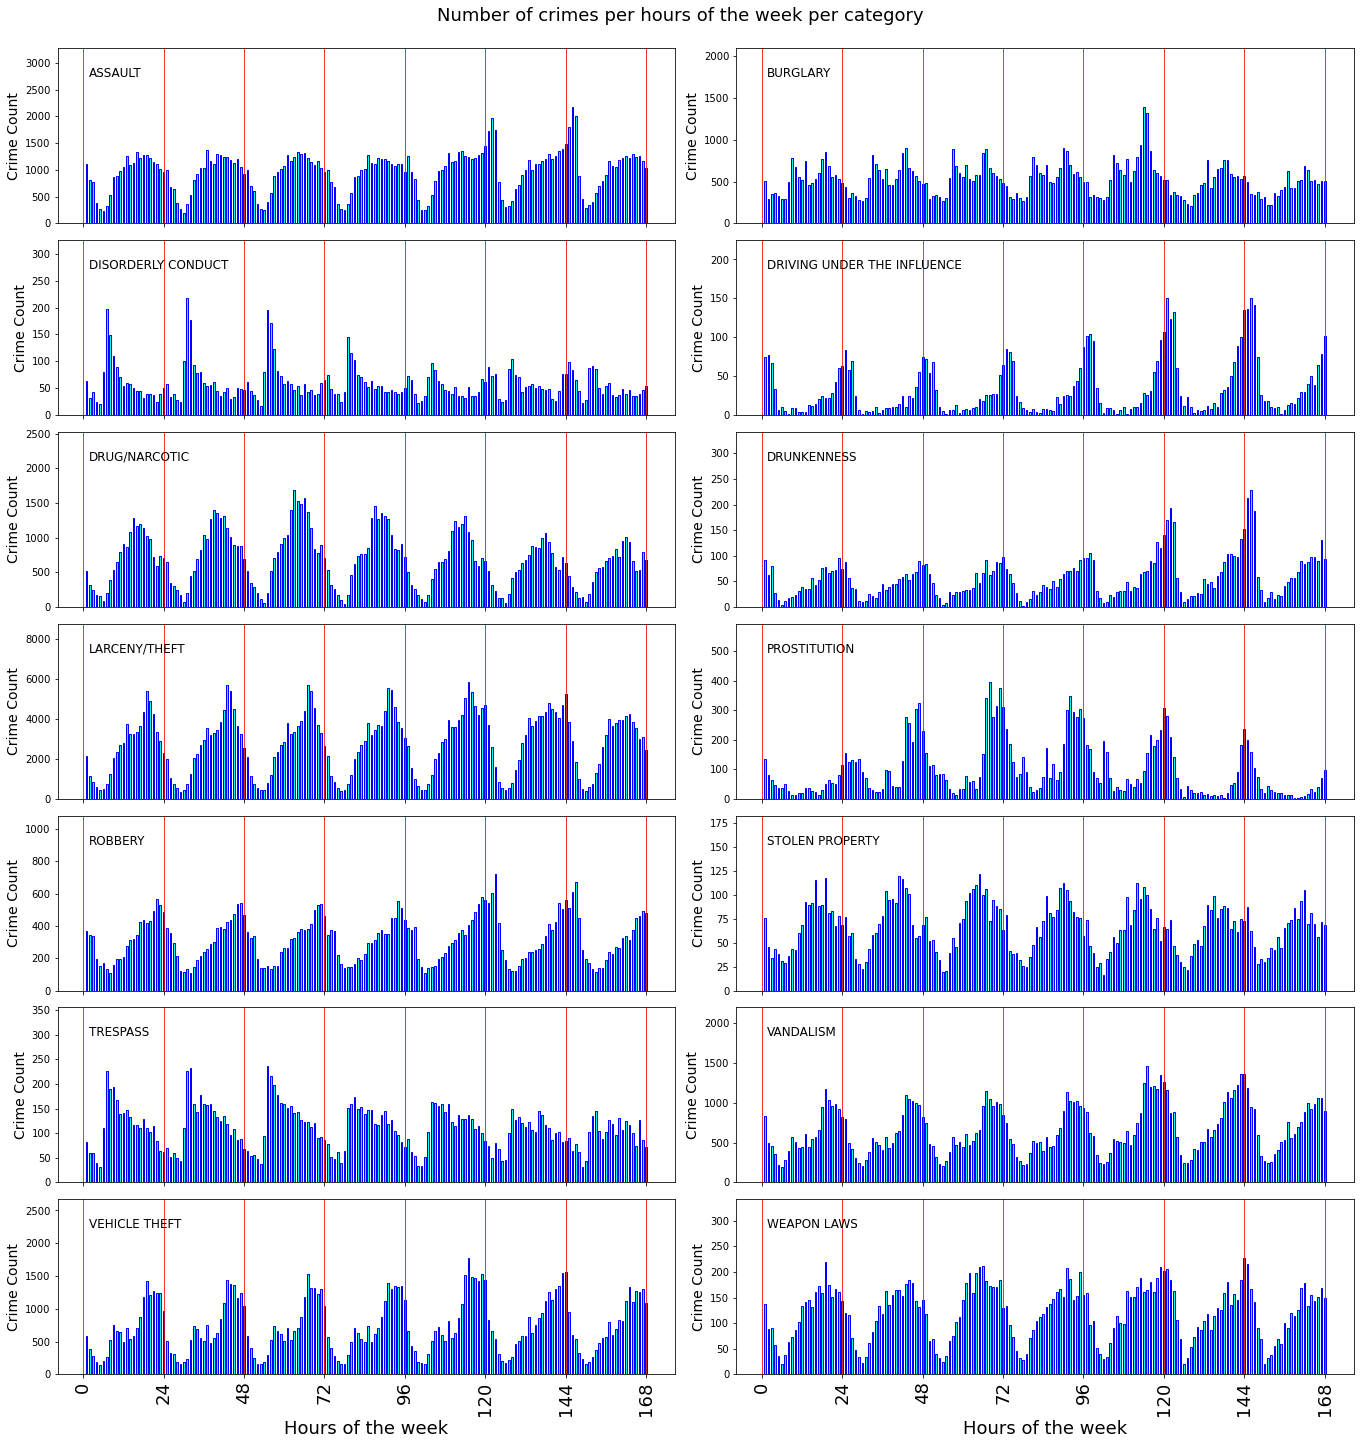

In [53]:
x_position = [0,24,48,72,96,120,144,168]

fig = plt.figure(figsize=(19, 20))
fig.suptitle('Number of crimes per hours of the week per category',y=1.001, fontsize=18)

for plot_index in range(1,len(focuscrimes)+1):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(int(len(focuscrimes)/2),2,plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
   # ax = sb.barplot(x = df_week_grouped.iloc[plot_index - 1].index, y = df_week_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.bar(df_hour_of_week_grouped.iloc[plot_index-1].index, df_hour_of_week_grouped.iloc[plot_index-1],width=0.5,edgecolor="blue",color='cyan')
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_hour_of_week_grouped.iloc[plot_index-1].name, y = 0.80, x = 0.05, loc = 'left')
    plt.ylabel('Crime Count',fontsize=14)
    plt.xlabel('Hours of the week',fontsize=18)
    plt.xticks(x_position,x_position, rotation=90, fontsize=18)
    plt.ylim(top=(np.max(df_hour_of_week_grouped.iloc[plot_index-1])+(np.max(df_hour_of_week_grouped.iloc[plot_index-1])*0.5)))
    plt.grid(which="major", axis="x", color="red")
    if plot_index<(len(focuscrimes)-1):
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.xlabel("")
plt.tight_layout()
plt.show()

Whilst the majority of categories of crime follow similar pattern over the 24 hours period, there is a huge difference regarding to the peak values. According to the burglaries category, we can notice that there is a significant peak on the Friday, just around 6 pm, when people go for a drink propably. 

Looking the trend at the assaults, driving under the influence and drunkneess categories, we found out that these types of crime happen most often on Saturdays, and Sundays. Also, it is wotrth noting that these crimes are reported to happen just after mid-night in both days. 


In terms of Describe Trespass and Disorderly Conduct categories, it is quite interesting that we see a sharp increase at 6 -7  o'clock especially on the first 3 days of the week.

Finally, according to the prostitution category, it is clear that incidents increase rapidly on Tuesdays, Wednesdays and Thursdays during the evening hours after before 12 a sharp increase in incidents during the night hours after 6 pm and before 2 am as we already know from hourly and day week plots.

### Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

# Calendar Plot

We select the drunkenness category to create the Caledar Plot.

### 1. Simple Calendar Plot

In [99]:
data_drunkeness = (df['Category'] == "DRUNKENNESS")
data_drunkeness = df.loc[data_drunkeness]

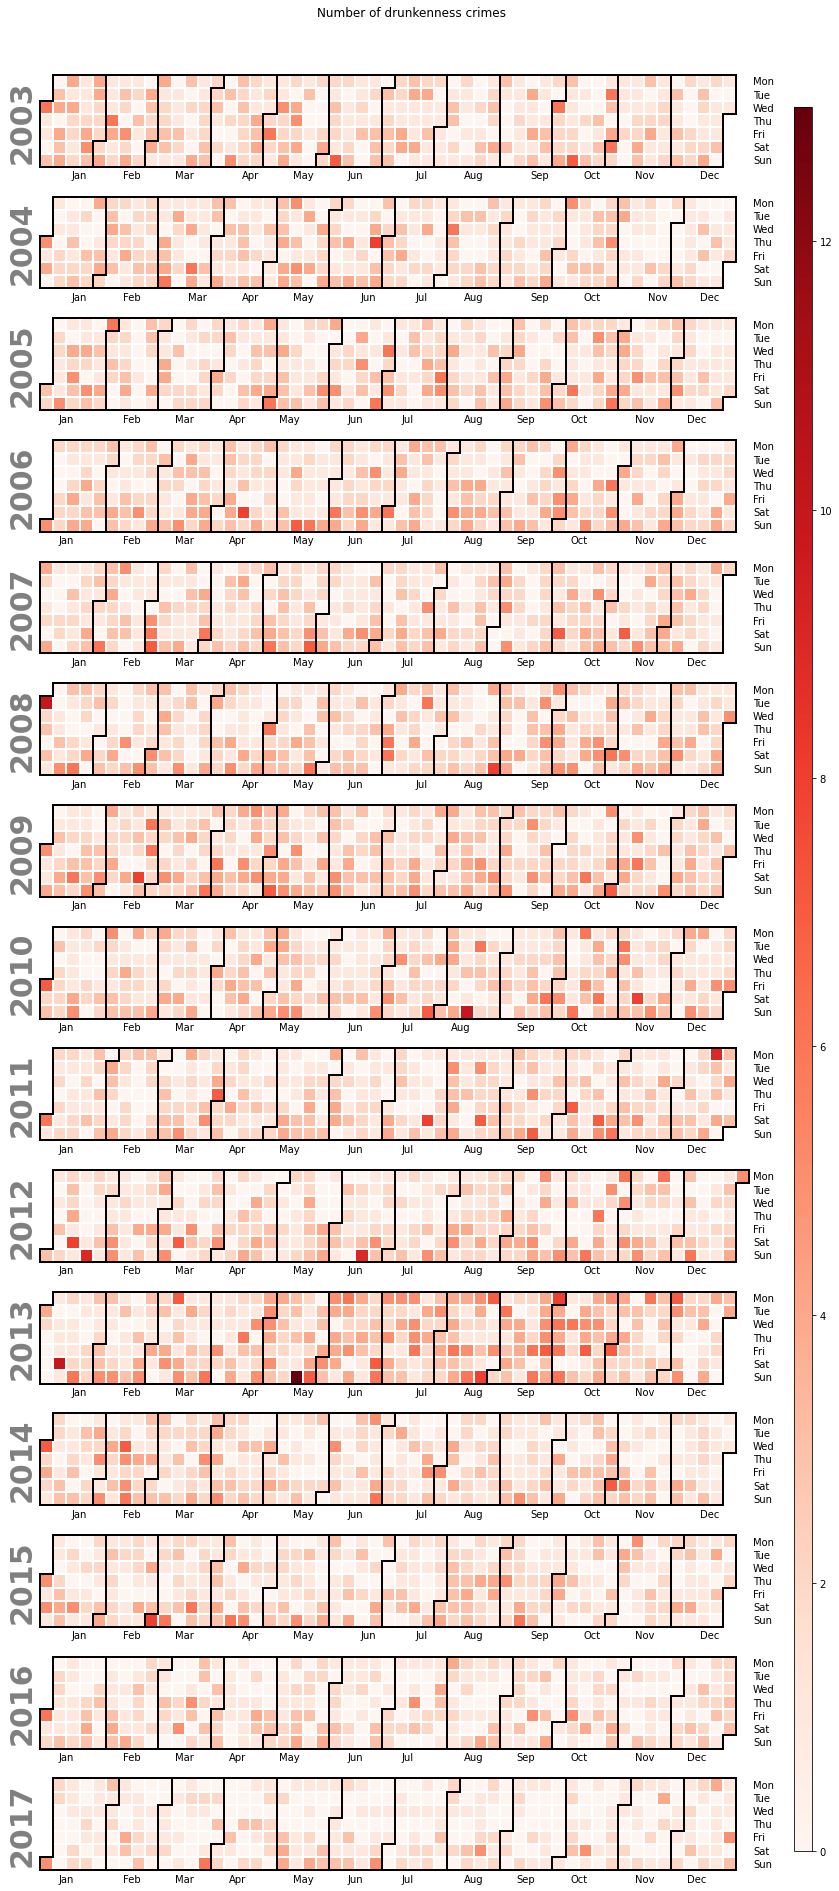

In [101]:
data_drunkeness.set_index('Date_Time', inplace=True)
# variables
col = 'PdId'
title = 'Number of drunkenness crimes\n'
#cmap = sb.dark_palette("#69d", as_cmap=True)
# plot
calplot.calplot(data_drunkeness[col], how='count', 
                suptitle=title, cmap='Reds',
                linecolor='w', linewidth=2, 
                fillcolor='w', edgecolor='black')
plt.show()

We can see that the whole time period in the data for the drunkenneess category which is divided into years and years into months and days. On y-axis, we can see the name of the days and the color gradient shows the number of crimes. Dark red colors mean more crimes, whereas lighter red colors mean less crimes. The simplicity and clarity of this plot makes it easily understandable, yet very insightful.

From the plot above, it is easy to identify that the maximum number of crimes have happened in the year 2013 expecially between May to October. It is worth noting that during the year 2013 the highest number of incidents occurs on the third Sunday of the month of May followed by a small decrease the following Sunday.

### 2. Interact Calendar Plot

Then, we want to create a more insightful calendar plot including a drop-down menu with PdDistrict variable. In the above plot we can see the total number of crimes for all PdDistricts for every year,nonth and date. But it will be more usefull to know how many drunkenness incidents occur in every PdDistrict to identify any pattern in a more specific area.

In cases such as these, we can add a drop down to our calendar plot and slice the data on the basis of the PdDistricts in the drop down. The easiest way to do this inside jupyter notebook is using widgets.

Create the dropdown with the items. In this case, we want to include a dropdown with all PdDistrict names.
Using a list function will convert all the values of the column PdDistrict into list items and the duplicate values are removed by converting it into a set.

In [90]:
PdDistricts = set(list(data_drunkeness['PdDistrict']))
print(PdDistricts)

{'TARAVAL', 'TENDERLOIN', 'PARK', 'BAYVIEW', 'SOUTHERN', 'NORTHERN', 'INGLESIDE', 'RICHMOND', 'CENTRAL', 'MISSION'}


In the function defined below, we first slice the data based on the value of PdDistrict. PdDistrict is the value that will be selected from the drop down list and passed into the function draw_calplot. Next line of the function creates the required calendar plot on the sliced data.

In [91]:
def draw_calplot(District):
   data_subset = data_drunkeness[data_drunkeness['PdDistrict'] == District]
   plt = calplot.calplot(data = data_subset[col], how = 'count',   cmap = 'Reds', suptitle = 'Number of drunkeness crimes in '+District)

The first argument of interact is the function we want to use to render the plot and the second argument is the drop down list ‘PdDistricts’. The value selected in the drop-down is passed through the variable ‘District’ into the function draw_calplot.

In [92]:
x = interact(draw_calplot, District = PdDistricts) 
plt.show()

interactive(children=(Dropdown(description='District', options=('TARAVAL', 'TENDERLOIN', 'PARK', 'BAYVIEW', 'S…

Continuing the same approach as at the Simple Calendar plot, it is clear that for expample at the year 2013 for the Taraval district the drunkenness incidents occur only the first Saturday and Friday in the month.

If we want to investigate or to find out some patterns in Bayview district for the year 2013, we notice that the most drunkenness incidents occur on Sundays, with the majority of them between the last days of August and the midle of October. 

### Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

# Polar Plot

We select the Vehicle Theft category to create a polar plot of its 24hour cycle.

In [63]:
# Create two columns for rho and theta
df['rho'] = np.sqrt(df['X']**2 + df['Y']**2)
df['theta'] = np.arctan2(df['Y'],df['X'])

In [64]:
# Take the data only for vehicle theft category
mask_vehicle_polar = (df['Category'] == "VEHICLE THEFT")
data_vehicle_polar = df.loc[mask_vehicle_polar]

In [66]:
# Find out the number of vehicle thefts per hour
df_hour_polar_grouped = data_vehicle_polar[data_vehicle_polar.Category.isin(focuscrimes)].groupby(['hour']).size().reset_index() 
df_hour_polar_grouped.rename(columns={0:'Vehicle_theft_Crimes_per_hour'}, inplace=True)

In the below table we can see the vahicle theft incidents per hour.

In [67]:
df_hour_polar_grouped

,hour,Vehicle_theft_Crimes_per_hour
0,0,4695
1,1,3206
2,2,2541
3,3,1572
4,4,1215
5,5,1217
6,6,1803
7,7,3105
8,8,4438
9,9,4351


In [95]:
# Convert the hours to radians
trans = 2 * np.pi * (df_hour_polar_grouped['hour'])/24

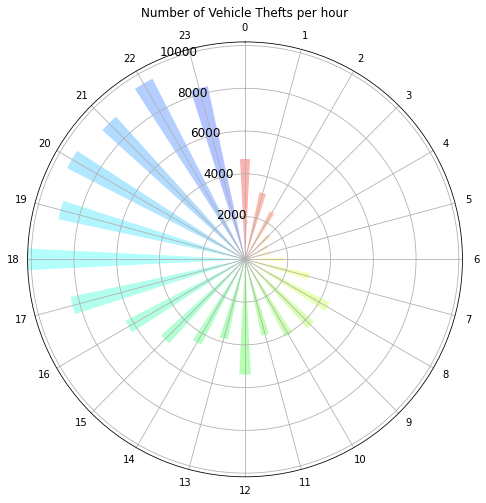

In [96]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = 'polar')
# Colors
COLORS = plt.cm.hsv(trans/3/np.pi)
ax.bar(trans, df_hour_polar_grouped['Vehicle_theft_Crimes_per_hour'], width = 0.1, alpha=0.3, color=COLORS)
# Make the labels go clockwise
ax.set_theta_direction(-1)

#Place Zero at Top
ax.set_theta_offset(np.pi/2)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_yticks([0, 2000, 4000, 6000, 8000, 10000])

# set the label names
ax.set_xticklabels(range(24))

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# Add custom annotations -----------------------------------------
# The following represent the heights in the values of the y axis
PAD = 10
ax.text(-0.2 * np.pi / 2, 2000 + PAD, "2000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 4000 + PAD, "4000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 6000 + PAD, "6000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 8000 + PAD, "8000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 10000 + PAD, "10000", ha="center", size=12)

ax.set_title('Number of Vehicle Thefts per hour')
#Bars to the wall
plt.ylim(0,np.max(df_hour_polar_grouped['Vehicle_theft_Crimes_per_hour']))

plt.show()

In [102]:
# comment make

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* 1 - Mention 10 examples of ways we can encode data.
* 2 - Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
* 3 - Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
* 4 - Explain in your own words: What is the problem with pie-charts?

### 1 - Mention 10 examples of ways we can encode data.
From the video we have he following examples of encoding:
1) **Position**

Encoding position can refer to a variety of techniques for representing the position of data within a larger dataset. Here are a few examples:

- One-hot encoding: One-hot encoding is a technique for converting categorical data into a format that can be used by machine learning algorithms. One way to encode the position of data within a larger dataset is to create a one-hot vector for each position. For example, if you have a dataset with 10 rows, you could encode the position of each row using a one-hot vector with 10 elements. The vector for the first row would have a 1 in the first position and 0s elsewhere, the vector for the second row would have a 1 in the second position and 0s elsewhere, and so on.

- Relative encoding: Another way to encode the position of data within a larger dataset is to use relative position encoding. This technique involves encoding the distance between each data point and a reference point (such as the beginning of the dataset or a particular anchor point). For example, if you have a time-series dataset, you could encode the position of each data point using the number of time steps since the beginning of the dataset.

- Geospatial encoding: If you are working with geospatial data, you can encode the position of each data point using latitude and longitude coordinates. This allows you to represent the position of the data within a larger geographic area.

2) **Length** 

Encoding length can also refer to a variety of techniques for representing the length of data. Here are a few examples:

- Fixed-length encoding: One way to encode the length of data is to use a fixed-length encoding scheme, where each piece of data is assigned a fixed number of bits. For example, if you are working with integers, you could use a 32-bit encoding scheme to represent each integer. This approach is simple and efficient, but it can be wasteful if your data has a wide range of possible lengths.

- Variable-length encoding: Another approach is to use a variable-length encoding scheme, where the number of bits used to represent each piece of data depends on its length. For example, you could use a variable-length encoding scheme called "Huffman coding" to encode a sequence of characters, where the more frequently occurring characters are represented using fewer bits. This approach can be more efficient than fixed-length encoding for data with a wide range of possible lengths.

3) **Area** 

Encoding area can also refer to a variety of techniques for representing the area of data within a larger geographic context. Here are a few examples:

- Grid encoding: One way to encode the area of data is to use a grid encoding scheme, where the larger geographic context is divided into a grid of equal-sized cells, and each cell is assigned a unique identifier. For example, you could use a 1 km x 1 km grid to encode the area of data within a larger city or region. This approach allows you to represent the location of data within a larger geographic context in a structured way.

- Polygon encoding: Another approach is to use a polygon encoding scheme, where the area of data is represented as a polygon with a set of vertices. For example, you could use a polygon encoding scheme to represent the area of a park or other geographic feature. This approach allows you to represent the shape of the data area in a more precise way than a grid encoding scheme.

- Geohash encoding: A third approach is to use a geohash encoding scheme, where the area of data is represented as a string of characters that encodes the latitude and longitude coordinates of the area. For example, you could use a geohash encoding scheme to represent the area of a specific building or address. This approach allows you to represent the location of data within a larger geographic context in a compact and flexible way.

4) **Shape** 

Encoding shape can refer to techniques for representing the shape of data. Here are a few examples:

- Vector encoding: One way to encode the shape of data is to use vector encoding, where the shape is represented as a set of points or vertices connected by lines or curves. For example, you could use vector encoding to represent the shape of a building, where the shape is represented as a series of points along its perimeter. This approach allows you to represent complex shapes with a high degree of precision.

- Raster encoding: Another approach is to use raster encoding, where the shape is represented as a grid of cells, each of which is either inside or outside the shape of interest. For example, you could use raster encoding to represent the shape of a tree canopy, where each cell in the grid represents either a tree or a non-tree area. This approach can be computationally efficient and is often used for remote sensing applications.

- Contour encoding: A third approach is to use contour encoding, where the shape is represented as a set of contours or lines that connect points of equal value. For example, you could use contour encoding to represent the shape of a hill or mountain, where the contours represent lines of equal elevation. This approach allows you to represent the shape of data in a way that emphasizes the contours or shape of interest.

- Polygon encoding: A fourth approach is to use polygon encoding, where the shape is represented as a closed polygon with a set of vertices. For example, you could use polygon encoding to represent the shape of a lake or other geographic feature. This approach allows you to represent the shape of data in a more precise way than raster encoding, while still being computationally efficient.

5) **Color**

Encoding color is the process of representing color information in a digital format that can be understood by computers. Here are some examples of different color encoding schemes:

- RGB (Red, Green, Blue) - This is the most common color encoding scheme used in digital imaging. In this scheme, colors are represented by combinations of red, green, and blue values. For example, the color white is represented by an RGB value of (255, 255, 255), where each value ranges from 0 to 255.

- CMYK (Cyan, Magenta, Yellow, Key/Black) - This is a color encoding scheme used in print media. In this scheme, colors are represented by combinations of cyan, magenta, yellow, and black values. The "key" value refers to the black component, which is often used to enhance contrast and provide a more accurate representation of dark colors.

- HSL (Hue, Saturation, Lightness) - This is a color encoding scheme that represents colors based on their hue (color), saturation (intensity), and lightness (brightness). In this scheme, colors are represented by three values: hue (0-360 degrees), saturation (0-100%), and lightness (0-100%).

- Hexadecimal - This is a color encoding scheme that uses a six-digit code to represent colors. Each digit in the code represents a value in the RGB color model. For example, the color white is represented by the hexadecimal code #FFFFFF, which corresponds to an RGB value of (255, 255, 255).

- LAB - This is a color encoding scheme that represents colors in a way that is designed to be more perceptually uniform than RGB or CMYK. In this scheme, colors are represented by three values: L (lightness), a (green-red axis), and b (blue-yellow axis). The L value ranges from 0 (black) to 100 (white), while the a and b values range from -128 to 127.



6) **Angle** 

Encoding angle is the process of representing angles in a digital format that can be understood by computers. Here are some examples of different angle encoding schemes:

- Degrees - This is the most common way of encoding angles, where angles are measured in degrees ranging from 0 to 360. For example, a right angle is 90 degrees, while a full circle is 360 degrees.

- Radians - This is another common way of encoding angles used in mathematics and programming. In this scheme, angles are measured in radians, which is a unit of measurement defined as the length of the arc of a circle divided by the radius of that circle. One full circle is equal to 2π radians, where π (pi) is approximately equal to 3.14159.

- Gradians - This is a less common way of encoding angles, where angles are measured in gradians, also known as gon or grade. In this scheme, a right angle is equal to 100 gradians, while a full circle is equal to 400 gradians.

- Binary Degrees - This is a binary angle encoding scheme used in computer graphics and image processing. In this scheme, angles are represented as binary numbers where the most significant bit (MSB) represents the sign of the angle (0 for positive, 1 for negative), and the remaining bits represent the magnitude of the angle in binary form.

- Compass Direction - This is an encoding scheme used for expressing directions, where angles are measured in relation to the four cardinal directions (north, south, east, and west) or eight intermediate directions (northeast, southeast, southwest, northwest). For example, an angle of 45 degrees might be represented as "northeast".

7) **Line weight** 

Encoding line weight is the process of representing the thickness or weight of lines in a digital format that can be understood by computers. Here are some examples of different line weight encoding schemes:

- Points - This is a common way of encoding line weight in graphic design and printing. In this scheme, line weight is measured in points (pt), where one point is equal to 1/72 of an inch. For example, a line weight of 1 pt is very thin, while a line weight of 10 pt is very thick.

- Pixels - In digital graphics and web design, line weight is often represented in pixels (px), which is a unit of measurement for screen resolution. In this scheme, line weight is measured in pixels, where one pixel represents one dot on the screen. The thickness of the line depends on the resolution of the screen, with higher resolutions generally requiring thicker lines.

- Millimeters - In technical drawings and engineering, line weight is often measured in millimeters (mm), which is a metric unit of measurement. In this scheme, line weight is measured in millimeters, where one millimeter is equal to 0.0394 inches.

- Inches - In some industries, such as architecture and construction, line weight may be measured in inches. In this scheme, line weight is measured in fractions of an inch, where one inch is equal to 25.4 millimeters.

- Relative thickness - In some software programs, line weight is represented as a relative thickness value, which allows users to adjust the line weight based on their preferences. For example, a line weight of "1" might be very thin, while a line weight of "10" might be very thick. The actual thickness of the line will depend on the scale and resolution of the digital image or document.

8) **Line ending** 

Encoding line endings is the process of representing the visual style or shape at the end of lines in a digital format that can be understood by computers. Here are some examples of different line ending encoding schemes:

- Butt - This is the default line ending style, where the line ends abruptly at the end point without any additional decoration or extension.

- Round - In this style, the line ends with a rounded cap that has the same diameter as the line thickness. This style is often used for decorative purposes or to soften the appearance of the line ending.

- Square - In this style, the line ends with a square cap that has the same width as the line thickness. This style is often used in technical drawings and engineering diagrams.

- Arrow - In this style, the line ends with an arrowhead that points in the direction of the line. The shape and size of the arrowhead can vary depending on the application.

- Diamond - In this style, the line ends with a diamond-shaped cap that has the same width as the line thickness. This style is often used for decorative purposes or to indicate the end of a path or route.

- Custom - Some software programs allow users to create their own custom line endings, which can be any shape or design that can be created using vector graphics. This allows for a wide range of creative possibilities and customization options.

9) **Texture** 

Encoding texture is the process of representing the surface characteristics of objects or materials in a digital format that can be understood by computers. Here are some examples of different texture encoding schemes:

- Bitmap - In this scheme, texture is represented as a bitmap or raster image, where each pixel represents a small part of the texture pattern. This technique is often used for creating realistic textures in 3D graphics and video games.

- Procedural - In this scheme, texture is generated procedurally using algorithms and mathematical functions. This allows for a wide range of textures to be generated automatically, without the need for manual texture creation.

- Vector - In this scheme, texture is represented using vector graphics, which allows for infinitely scalable and customizable textures. Vector textures are often used in graphic design and illustration.

- Normal Maps - In 3D graphics, normal maps are used to simulate the appearance of surface details such as bumps, wrinkles, and creases without actually modeling the geometry of those details. Normal maps are created by encoding the surface normals of a texture into a separate image, which is then applied to a flat surface to create the appearance of 3D detail.

- Displacement Maps - Similar to normal maps, displacement maps are used to create the appearance of 3D surface detail. However, instead of encoding surface normals, displacement maps encode the actual height or depth of surface details, which can then be used to displace the geometry of the surface to create a more realistic appearance.

- Substance Designer - Substance Designer is a software tool used for creating procedural textures and materials. It allows users to create complex textures using a node-based workflow and a library of pre-made nodes for generating different types of patterns, noises, and other effects.


10) **Pattern** 


Encoding pattern is the process of representing repeated designs or motifs in a digital format that can be understood by computers. Here are some examples of different pattern encoding schemes:


- Tiling - In this scheme, pattern is created by tiling a smaller pattern or tile over a larger area. The smaller pattern can be repeated in various ways to create different types of patterns, such as regular or irregular patterns, diagonal or offset patterns, and so on.

- Symmetry - In this scheme, pattern is created by applying different types of symmetry operations to a smaller pattern or tile. For example, a pattern can be reflected across a vertical or horizontal axis, rotated by a certain angle, or translated by a certain distance to create different types of symmetrical patterns.

- Algorithmic - In this scheme, pattern is generated algorithmically using mathematical functions and algorithms. This allows for a wide range of complex and dynamic patterns to be generated automatically, without the need for manual pattern creation.

- Generative Adversarial Networks (GANs) - GANs are a type of artificial intelligence algorithm that can learn to generate new patterns and images by training on existing data. GANs can be used to create unique and novel patterns that are unlike anything that has been created before.




Overall, the choice of encoding technique depends on the type and nature of the data and the machine learning algorithm being used. It is important to evaluate the performance of different encoding techniques to determine which one is the best fit for a given dataset and problem.

### 2 - Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

Not all encodings are created equally. Some encodings are good at revealing some aspects while others are good at revealing others. Different types of encoding schemes are designed for different purposes and have their own strengths and weaknesses. Some encodings may be better suited for representing certain types of data or visual styles, while others may be better suited for other types of data.


An example cxould be the one that is shown in the Lecture 4 in Part 1. Where we can see an encoding of 5 elements: A, B, C, D & E in a pie chart. While that won't give any intuitive or easily understanding of the amount of each variable, if we transform that angle encoding (piechart) into a lenth encoding (bar chart) we can clearly distinguish the amounts of each variable. 

Another encoding, it´s a Generative Adversarial Networks (GANs), which will generate new patterns and images by training on existing data. GANs can be used to create unique and novel patterns that are unlike anything that has been created before.

###  3 - Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

Here are three different encondings that may be difficult to the human eye to parse: <br>


1) **Area** <br>
If we usea area as an encoder it will be hard to see the diferences, because some tinny changes in area that might be significant to the result might not be significant to the eye. Generally, pie charts use the size of the slices to represent proportions of a whole. However, when the slices become very small, it can be difficult to accurately judge their size and compare them to the other slices in the chart. This can make it challenging to accurately interpret the data being represented.

The following video perfectly shows how tinny changes in area are not percieved by human eye. 

[![IMAGE ALT TEXT HERE](https://i.dailymail.co.uk/i/pix/2016/05/04/17/33D63B4200000578-0-image-a-106_1462379588842.jpg)](https://www.youtube.com/shorts/6aDB9VLnyZQ)

2) **Angle**<br> 

- Radar charts use a series of lines radiating from a central point to represent different variables or categories. While these charts can be effective for showing patterns or trends in the data, they can be difficult to accurately interpret when there are many variables or categories being represented. This is because it can be challenging to accurately judge the angles of the lines and accurately compare the values between the different variables.


- Pie charts use the anlge of the slices of the pie to quantify the amount of value that has changed. It is not a good aprroach as differences in the angles are difficult to see. <br>
<img src="https://i.insider.com/51bf13026bb3f7257a000030?width=600&format=jpeg&auto=webp" alt="drawing" width="600"/>

3) **Hue Saturation Value (HSV)**<br> 

HSV encoding is a color model that represents colors using three values: hue, saturation, and value. While it can be useful for color analysis and manipulation, it can be difficult for humans to accurately perceive the relative differences between colors encoded using HSV.

- Example of a visualization online that uses HSV encoding:

The Color Picker tool in Adobe Photoshop uses HSV encoding to represent colors. While it can be useful for selecting and manipulating colors in a digital format, it can be difficult for humans to accurately perceive the differences between colors encoded using HSV, especially at the boundaries between different hues. This can make it challenging to create color schemes that look good and work well together.

### 4 - Explain in your own words: What is the problem with pie-charts?

Pie charts are a popular way to represent data, but they have several potential problems:

Limited ability to show large amounts of data: Pie charts are best used for displaying a few categories of data. If you have too many categories, the chart can become cluttered and difficult to read.

Difficulty comparing data: It can be difficult to compare the size of different slices of the pie chart. It's often easier to compare data using a bar chart or a line chart.

Misleading visual representation: Depending on the size of the slices and the order they are presented in, pie charts can be misleading. The human eye can easily be fooled by the way the slices are arranged.

Inability to show trends over time: Pie charts are not well-suited for displaying trends over time. If you want to show how data changes over time, it's better to use a line chart.

Difficulty displaying negative values: Pie charts can only show positive values. If you need to display negative values, you will need to use a different type of chart, such as a bar chart.

We can se an example of how bad pie charts can be in the next photo:

<img src="https://flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart-620x465.png" alt="drawing" width="400"/>

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

In [ ]:
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)


only_Sundays=df[df['DayOfWeek']=='Sunday']
Sundays_and_vehicle_theft=only_Sundays[only_Sundays['Category']=='VEHICLE THEFT']

final=Sundays_and_vehicle_theft[['Category','DayOfWeek','PdDistrict']]
final=final.groupby(by="PdDistrict").size().reset_index(name="counts")
final=final.rename(columns={"PdDistrict":"DISTRICT"})

fig = px.choropleth_mapbox(final, geojson=counties, locations='DISTRICT', color='counts',
                           color_continuous_scale="Viridis",
                           range_color=(356, 2846),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.773972, "lon":  -122.431297},
                           opacity=0.5,
                           labels={'counts':'Total number of vehicle thefts on Sundays'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


The worst district to park the car on a Sunday is "Ingleside", and the best district is "Tenderloin"

### Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?

We can do this by changing the range values on the range color attribute

In [ ]:
fig = px.choropleth_mapbox(final, geojson=counties, locations='DISTRICT', color='counts',
                           color_continuous_scale="Viridis",
                           range_color=(356, 2000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.773972, "lon":  -122.431297},
                           opacity=0.5,
                           labels={'counts':'Total number of vehicle thefts on Sundays'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In this case it looks like that in the south part of SF the cases of vehicle theft look pretty much the same which is not true.

### Why do you think perceptual errors are a problem? Try to think of a few examples.


In our case there are districts that are larger than others (in terms of area size) or they might be more highly populated compared to others. These informations are not encoded in our visualization. Maybe we could have divided the number of cases by the population (if we had this information) of each district in order to have a more "reliable" visualization.

Also, as in the example above, the colors used to represent the data, are not distinguishable so it makes it harder for the viewer to "decode" the data.

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* 1 In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* 2 Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* 3 Find your own example of human noise in the data and visualize it.

### 1 In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 

#### 1.1 In the temporal activity for PROSTITUTION something surprising is going on on Thursday.

Binning is a process of grouping continuous data into discrete bins or intervals. Binning is often used to simplify data analysis by reducing the number of data points to be analyzed. However, when data contain errors, binning can lead to biased results.

For our dataset the data errors in the PROSTITUTION category on Thursdays can bias binned data is by causing misclassification of data points. For example, if we have a bar chart with daily bins and some crimes are classified on Thursday's bin by mistake, it will be misclassified into the wrong bin. Also, these data errors affect the validity of other visualizations for other useful variables such as the PDDISTRINCT variable due to the misclassification of crimes. This misclassification problem can lead to an underestimation or overestimation of the true value of the bin.

In addition, these data errors can reduce the accuracy of binned data by introducing noise into the data. This noise can make it more difficult to detect meaningful patterns in the data, leading to reduced statistical power and increased uncertainty in the results.

Overall, it is important to carefully consider the potential impact of data errors on binned data and to take steps to minimize their impact, such as using more accurate measurement techniques or carefully selecting bin boundaries.

#### 1.2 Timestamps recorded using jitter-plots in the DAOST exercise.
We saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself here, where I've highlighted the phenomenon I'm talking about.

As we can see in the below Jitter Plot, there's clearly more crimes reported in round numbers. That could be due to the fact that psycologically we tand to go for round numbers. Also, when noting down something, if it's 13:58 we'll probably noted down as if it was 14:00. 

<img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/jitter.png" alt="drawing" width="600"/>

The problem with those anotations, it's that when it comes to binnning, all those anotations made in round numbers will tend to be in the same bin, as also we'll probably bin on round numbers. That could lead to missconception. 

Adiionally, we can also appreciate that most of the crimes have minute precission, so we have to choose carefully the bins, as only one plot with one bin distribution could mislead our assumptions. One example will be choosing bins [19:00-19:30] - [19:31-19:00] that could lead to an error as probably we'll end with more points in the fist bin as it has more round numbers. 

#### 1.3 The Hall of Justice on the 800 block of Bryant street seems to be an unlikely hotspot for sex offences. Take a look here here.

Another bias we might lead to is the unkowledge of the area. We can see that for the 800 block, highlighted in the image below, there are realted a lot of crimes related to sex offense. That might bring our attention due to the amount of crimes related to that specific spot and we might asume that it's a "bad neighbourhood" or a problemeatic street.
The reality couldn't be more different. If you inspect the location with more detention, you'll see that it's actually the SF's hall of Justice and it's very unlikely that, in sppecific sex offense crimes, are comitted just in front of the Hall of Justice. Aditionally, that could lead also to a missassumption when we zoom out on the map, as it's less likely that we realise that there's the location of the Hall of Justice, and more crimes will be grouped in that area. 

<img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/crime_hot_spot.png" alt="drawing" width="600"/>


### 2 Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

- If Errors are not noticed, when presenting data you will be very likely to missclassify the values in the correct bins, leading to bad visualitzation plots. Additionally, you will be very likely to have outliers in your plots. 
- If Errors in the data are not noticed, you will be very likely to get wrong statistical assumptions. 
- Prediction Error: If the errors are not noticed and there is a ML model build up to predict any kind of crime. The ML model will be very likely to have a high bias. 

### 3 Find your own example of human noise in the data and visualize it..

#### Vehicle Thefts Human Noise Visualization

Text(0, 0.5, 'Count Vehicle Thefts')

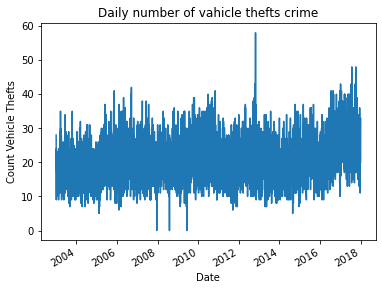

In [103]:
# Daily time series
data_select_cat = (df['Category'] == "VANDALISM")
data_select = df.loc[data_select_cat]
col_ser=['Date_Time','PdId']
series=data_select[col_ser]
series=series.set_index('Date_Time')
series.head()

daily=series.resample('D').count()

# Plotting the time series of given dataframe
plt.plot(daily.index, daily.values)
 
# Giving title to the chart using plt.title
plt.title('Daily number of vahicle thefts crime')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to te chart
plt.xlabel('Date')
plt.ylabel('Count Vehicle Thefts')

Text(0, 0.5, 'Count Vehicle Thefts')

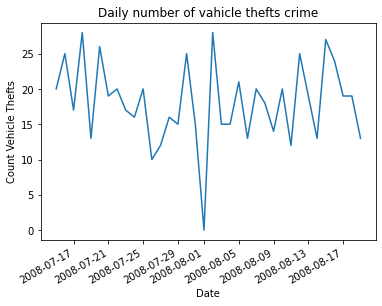

In [107]:
### find zero values
# Zoom the above time series
# Select DataFrame rows between two dates
start_date = '2008-07-15'
end_date   = '2008-08-20'
mask = (data_select['Date_Time'] > start_date) & (data_select['Date_Time'] <= end_date)

# Using pandas.DataFrame.loc[] to Filter Rows by Dates
df2 = data_select.loc[mask]

col_ser=['Date_Time','PdId']
series=df2[col_ser]
series=series.set_index('Date_Time')
series.head()

daily=series.resample('D').count()

# Plotting the time series of given dataframe
plt.plot(daily.index, daily.values)
 
# Giving title to the chart using plt.title
plt.title('Daily number of vahicle thefts crime')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to te chart
plt.xlabel('Date')
plt.ylabel('Count Vehicle Thefts')

In [108]:
daily

,PdId
Date_Time,
2008-07-15,20
2008-07-16,25
2008-07-17,17
2008-07-18,28
2008-07-19,13
2008-07-20,26
2008-07-21,19
2008-07-22,20
2008-07-23,17


In [84]:
np.max(daily)
daily.idxmin()

PdId   2008-08-01
dtype: datetime64[ns]

In [85]:
np.max(daily)
daily.idxmax()

PdId   2008-07-18
dtype: datetime64[ns]